In [41]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import EfficientSU2
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import numpy as np

ansatz = EfficientSU2(6, entanglement='linear', reps=3, skip_final_rotation_layer=True).decompose()
ansatz.draw()


┌──────────┐ ┌──────────┐     ┌───────────┐┌───────────┐             »
q_0: ┤ Ry(θ[0]) ├─┤ Rz(θ[6]) ├──■──┤ Ry(θ[12]) ├┤ Rz(θ[18]) ├─────────────»
     ├──────────┤ ├──────────┤┌─┴─┐└───────────┘├───────────┤┌───────────┐»
q_1: ┤ Ry(θ[1]) ├─┤ Rz(θ[7]) ├┤ X ├──────■──────┤ Ry(θ[13]) ├┤ Rz(θ[19]) ├»
     ├──────────┤ ├──────────┤└───┘    ┌─┴─┐    └───────────┘├───────────┤»
q_2: ┤ Ry(θ[2]) ├─┤ Rz(θ[8]) ├─────────┤ X ├──────────■──────┤ Ry(θ[14]) ├»
     ├──────────┤ ├──────────┤         └───┘        ┌─┴─┐    └───────────┘»
q_3: ┤ Ry(θ[3]) ├─┤ Rz(θ[9]) ├──────────────────────┤ X ├──────────■──────»
     ├──────────┤┌┴──────────┤                      └───┘        ┌─┴─┐    »
q_4: ┤ Ry(θ[4]) ├┤ Rz(θ[10]) ├───────────────────────────────────┤ X ├────»
     ├──────────┤├───────────┤                                   └───┘    »
q_5: ┤ Ry(θ[5]) ├┤ Rz(θ[11]) ├────────────────────────────────────────────»
     └──────────┘└───────────┘                                            »
«                  ┌───────────┐┌───────────┐                          »
«q_0: ──────■──────┤ Ry(θ[24]) ├┤ Rz(θ[30]) ├───────────────────■──────»
«         ┌─┴─┐    └───────────┘├───────────┤┌───────────┐    ┌─┴─┐    »
«q_1: ────┤ X ├──────────■──────┤ Ry(θ[25]) ├┤ Rz(θ[31]) ├────┤ X ├────»
«     ┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐»
«q_2: ┤ Rz(θ[20]) ├────┤ X ├──────────■──────┤ Ry(θ[26]) ├┤ Rz(θ[32]) ├»
«     ├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤»
«q_3: ┤ Ry(θ[15]) ├┤ Rz(θ[21]) ├────┤ X ├──────────■──────┤ Ry(θ[27]) ├»
«     └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘»
«q_4: ──────■──────┤ Ry(θ[16]) ├┤ Rz(θ[22]) ├────┤ X ├──────────■──────»
«         ┌─┴─┐    ├───────────┤├───────────┤    └───┘        ┌─┴─┐    »
«q_5: ────┤ X ├────┤ Ry(θ[17]) ├┤ Rz(θ[23]) ├─────────────────┤ X ├────»
«         └───┘    └───────────┘└───────────┘                 └───┘    »
«                                         
«q_0: ────────────────────────────────────
«                                         
«q_1: ──────■─────────────────────────────
«         ┌─┴─┐                           
«q_2: ────┤ X ├──────────■────────────────
«     ┌───┴───┴───┐    ┌─┴─┐              
«q_3: ┤ Rz(θ[33]) ├────┤ X ├──────■───────
«     ├───────────┤┌───┴───┴───┐┌─┴─┐     
«q_4: ┤ Ry(θ[28]) ├┤ Rz(θ[34]) ├┤ X ├──■──
«     ├───────────┤├───────────┤└───┘┌─┴─┐
«q_5: ┤ Ry(θ[29]) ├┤ Rz(θ[35]) ├─────┤ X ├
«     └───────────┘└───────────┘     └───┘

In [46]:
from qiskit.quantum_info import DensityMatrix


qc = QuantumCircuit(6)

qubits = [0,1,2,3,4,5]
parameters = [ 3.11317963e+00,  4.13115199e+00,  4.29674847e-01, -1.52975630e+00,
        2.60415695e-01,  1.98079378e-01, -1.40842930e-01,  2.80300516e-01,
        2.95056543e-01,  2.43323580e-02, -4.08504070e-02,  5.11327297e-01,
       -2.02439945e-02,  4.58544776e-01,  5.70987146e-01, -1.12254762e-02,
        2.07061049e-01,  4.54376095e-01, -2.00549924e+00,  4.13272186e-01,
       -8.24440050e-02,  2.97016728e-01, -2.86139650e-02, -1.43951822e-01,
        1.55875114e+00,  8.33615771e-01, -1.45146699e+00,  2.21693445e-01,
        3.27873071e-01,  3.03459707e-01, -3.32164149e-03, -4.58021052e-01,
        6.69112706e-03,  3.41647268e-01,  1.59543434e-01, -1.62087871e-01]

for i in range(6):
    qc.ry(parameters[i], i)
    qc.rz(parameters[i+6], i)

for i in range(5):
    qc.cnot(i, i+1)

for i in range(6):
    qc.ry(parameters[i+12], i)
    qc.rz(parameters[i+18], i)

for i in range(5):
    qc.cnot(i, i+1)


state = DensityMatrix(qc)
print(state.to_statevector())
print(np.trace(np.dot(state, state)))

print(state.probabilities_dict())

qc.measure_all()

qc.draw()



Statevector([ 5.67084299e-04-8.10691024e-04j,
              1.46335616e-02-1.95423564e-02j,
             -3.81039510e-03+2.57918510e-03j,
              1.23638466e-02+1.64337627e-02j,
             -1.21907981e-04+1.45371553e-04j,
              4.35241837e-02+2.96446058e-03j,
             -4.37341259e-04+7.45106820e-05j,
              8.93590472e-02+7.25755676e-03j,
              7.22021150e-05-1.10453116e-04j,
              2.67189824e-03-3.40498314e-03j,
             -5.27938429e-04+4.38288898e-04j,
              3.49796644e-03+5.47081399e-04j,
              5.32652168e-05-9.08176074e-05j,
             -2.36928159e-02+2.10421253e-03j,
              2.36041233e-04-8.40750247e-05j,
             -5.18439894e-02+6.09800143e-03j,
              7.13940389e-05-1.45957152e-04j,
              1.84747166e-03-3.51083437e-03j,
             -5.51663903e-04+5.12137106e-04j,
              2.35757364e-03+2.42130999e-03j,
             -7.53765646e-04+1.06538941e-03j,
              3.00264055e-01-4.332

┌────────────┐┌──────────────┐     ┌───────────────┐┌─────────────┐»
   q_0: ─┤ Ry(3.1132) ├┤ Rz(-0.14084) ├──■──┤ Ry(-0.020244) ├┤ Rz(-2.0055) ├»
         ├────────────┤└┬────────────┬┘┌─┴─┐└───────────────┘├─────────────┤»
   q_1: ─┤ Ry(4.1312) ├─┤ Rz(0.2803) ├─┤ X ├────────■────────┤ Ry(0.45854) ├»
        ┌┴────────────┤┌┴────────────┤ └───┘      ┌─┴─┐      └─────────────┘»
   q_2: ┤ Ry(0.42967) ├┤ Rz(0.29506) ├────────────┤ X ├─────────────■───────»
        ├─────────────┤├─────────────┴┐           └───┘           ┌─┴─┐     »
   q_3: ┤ Ry(-1.5298) ├┤ Rz(0.024332) ├───────────────────────────┤ X ├─────»
        ├─────────────┤├──────────────┤                           └───┘     »
   q_4: ┤ Ry(0.26042) ├┤ Rz(-0.04085) ├─────────────────────────────────────»
        ├─────────────┤├─────────────┬┘                                     »
   q_5: ┤ Ry(0.19808) ├┤ Rz(0.51133) ├──────────────────────────────────────»
        └─────────────┘└─────────────┘                                      »
meas: 6/════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                             »
«   q_0: ───────────────────────■─────────────────────────────────────────────»
«        ┌─────────────┐      ┌─┴─┐                                           »
«   q_1: ┤ Rz(0.41327) ├──────┤ X ├─────────────■─────────────────────────────»
«        ├─────────────┤┌─────┴───┴─────┐     ┌─┴─┐                           »
«   q_2: ┤ Ry(0.57099) ├┤ Rz(-0.082444) ├─────┤ X ├─────────────■─────────────»
«        └─────────────┘├───────────────┤┌────┴───┴────┐      ┌─┴─┐           »
«   q_3: ───────■───────┤ Ry(-0.011225) ├┤ Rz(0.29702) ├──────┤ X ├────────■──»
«             ┌─┴─┐     └───────────────┘├─────────────┤┌─────┴───┴─────┐┌─┴─┐»
«   q_4: ─────┤ X ├─────────────■────────┤ Ry(0.20706) ├┤ Rz(-0.028614) ├┤ X ├»
«             └───┘           ┌─┴─┐      ├─────────────┤└┬──────────────┤└───┘»
«   q_5: ─────────────────────┤ X ├──────┤ Ry(0.45438) ├─┤ Rz(-0.14395) ├─────»
«                             └───┘      └─────────────┘ └──────────────┘     »
«meas: 6/═════════════════════════════════════════════════════════════════════»
«                                                                             »
«              ░ ┌─┐               
«   q_0: ──────░─┤M├───────────────
«              ░ └╥┘┌─┐            
«   q_1: ──────░──╫─┤M├────────────
«              ░  ║ └╥┘┌─┐         
«   q_2: ──────░──╫──╫─┤M├─────────
«              ░  ║  ║ └╥┘┌─┐      
«   q_3: ──────░──╫──╫──╫─┤M├──────
«              ░  ║  ║  ║ └╥┘┌─┐   
«   q_4: ──■───░──╫──╫──╫──╫─┤M├───
«        ┌─┴─┐ ░  ║  ║  ║  ║ └╥┘┌─┐
«   q_5: ┤ X ├─░──╫──╫──╫──╫──╫─┤M├
«        └───┘ ░  ║  ║  ║  ║  ║ └╥┘
«meas: 6/═════════╩══╩══╩══╩══╩══╩═
«                 0  1  2  3  4  5

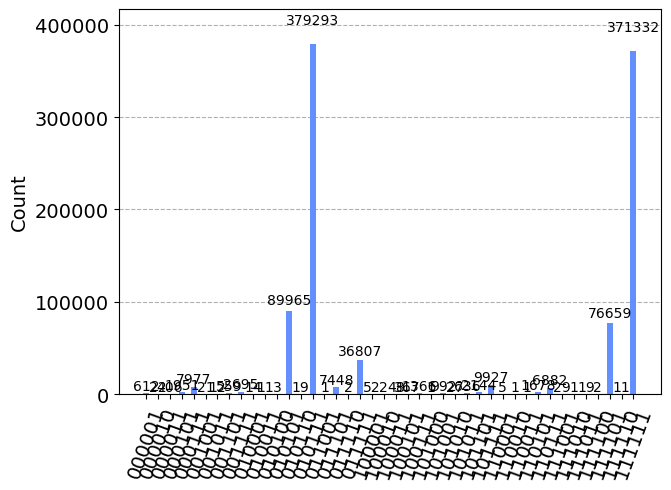

In [35]:
circuit = qc


# Use Aer's qasm_simulator
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000000)
result = job.result()

counts = result.get_counts(compiled_circuit)

plot_histogram(counts)